In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from string import punctuation
from nltk import ngrams


In [3]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
path_database = "D:\\Databases\\"


In [5]:
dados = pd.read_csv(f"{path_database}Files\\imdb-reviews-pt-br.csv")


In [6]:
dados.head()


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [7]:
dados.shape


(49459, 4)

In [8]:
treino, teste, classe_treino, classe_teste = train_test_split(
    dados.text_pt, dados.sentiment, random_state=42)


In [9]:
print(f'dados de treino: {len(treino)}')
print(f'dados de teste: {len(teste)}')
print(f'dados de classe treino: {len(classe_treino)}')
print(f'dados de classe teste: {len(classe_teste)}')


dados de treino: 37094
dados de teste: 12365
dados de classe treino: 37094
dados de classe teste: 12365


In [10]:
regressao_logistica = LogisticRegression()

In [11]:
dados['classificacao'] = dados.sentiment.replace(["neg", 'pos'], [0, 1])

In [12]:
print('Os primeiros\n')
display(dados.head())

print('Os últimos\n')
display(dados.tail())

Os primeiros



,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


Os últimos



,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [13]:
dados['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [14]:
texto = ["Assistir um filme ótimo", "Assistir um filme ruim"]
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(texto)

In [15]:
vetorizar.get_feature_names()

c:\Users\rober\Desktop\machine-learning\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Assistir', 'filme', 'ruim', 'um', 'ótimo']

In [16]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [17]:
matriz_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
matriz_sparse

,Assistir,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [18]:
bag_of_words = vetorizar.fit_transform(dados.text_pt)
bag_of_words.shape

(49459, 50)

In [19]:
treino, teste, classe_treino, classe_teste = train_test_split(
    bag_of_words, dados.classificacao, random_state=42)

In [20]:
def classificar_texto(data_frame, column_text, column_classifier):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(data_frame[column_text])

    x_train, x_test, y_train, y_test = train_test_split(
        bag_of_words, data_frame[column_classifier], random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(x_train, y_train)
    accuracia = regressao_logistica.score(x_test, y_test)
    return accuracia


In [21]:

print(f'Resultado de acerto {classificar_texto(dados, "text_pt", "classificacao")}')


Resultado de acerto 0.6583097452486858


In [22]:
def nuvem_palavras_neg(dataframe, column):
    text_neg = dataframe.query("sentiment == 'neg'") 
    all_words = ' '.join([text for text in text_neg[column]])
    word_c = WordCloud(width=800, height=500,
                       max_font_size=110, collocations=False).generate(all_words)
    plt.figure(figsize=(24, 6))
    plt.imshow(word_c, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [23]:
def nuvem_palavras_pos(dataframe, column):
    text_pos = dataframe.query("sentiment == 'pos'") 
    all_words = ' '.join([text for text in text_pos[column]])
    word_c = WordCloud(width=800, height=500,
                       max_font_size=110, collocations=False).generate(all_words)
    plt.figure(figsize=(24, 6))
    plt.imshow(word_c, interpolation='bilinear')
    plt.axis('off')
    plt.show()


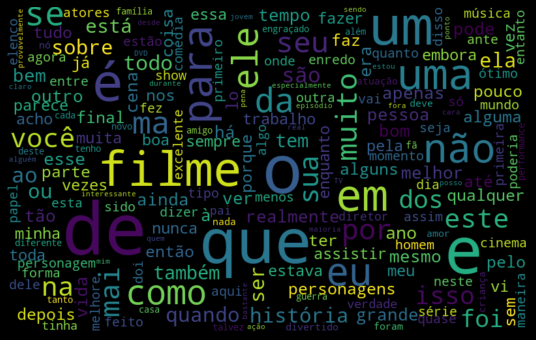

In [24]:
nuvem_palavras_pos(dados, 'text_pt')

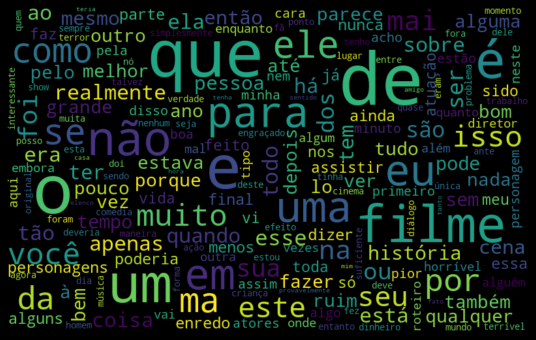

In [25]:
nuvem_palavras_neg(dados, 'text_pt')

In [26]:
all_words = ' '.join([text for text in dados['text_pt']])

In [27]:
word_c = WordCloud(width=800, height=500,
                   max_font_size=110, collocations=False).generate(all_words)


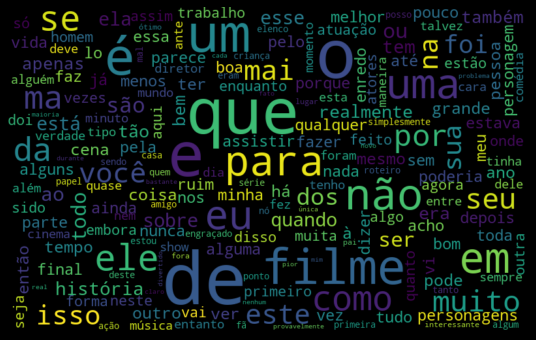

In [28]:
plt.figure(figsize=(24, 6))
plt.imshow(word_c, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
dados.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [30]:
dados.query("sentiment == 'neg'")

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
37113,37115,"Towards the end of the movie, I felt it was to...","No final do filme, senti que era muito técnico...",neg,0
37114,37116,This is the kind of movie that my enemies cont...,Este é o tipo de filme que meus inimigos me as...,neg,0
37115,37117,I saw Descent last night at the Stockholm Film...,Eu vi Descent na noite passada no Stockholm Fi...,neg,0
37116,37118,Some films that you pick up for a pound turn o...,Alguns filmes que você escolhe por um quilo sã...,neg,0


In [31]:

token_whitespace = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_whitespace.tokenize(all_words) 
freq = nltk.FreqDist(token_frase)

In [32]:
freq

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [33]:
df_freq = pd.DataFrame({'palavra': list(freq.keys()), 'frequencia': list(freq.values())})


In [34]:
df_freq

,palavra,frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [35]:
df_freq.nlargest(columns='frequencia', n=10)

,palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [36]:
def pareto(dataframe, column, qty):
    all_words = ' '.join([text for text in dataframe[column]])
    token_whitespace = nltk.tokenize.WhitespaceTokenizer()
    token_frase = token_whitespace.tokenize(all_words)
    freq = nltk.FreqDist(token_frase)

    df_dic = {'palavra': list(freq.keys()), 'frequencia': list(freq.values())}
    df_freq = pd.DataFrame(df_dic)
    df_freq_mostly = df_freq.nlargest(columns='frequencia', n=qty)

    plt.figure(figsize=(24, 6))

    ax = sns.barplot(data=df_freq_mostly, x='palavra',
                     y='frequencia', color='gray')
    ax.set(ylabel="Contagem")

    plt.show()


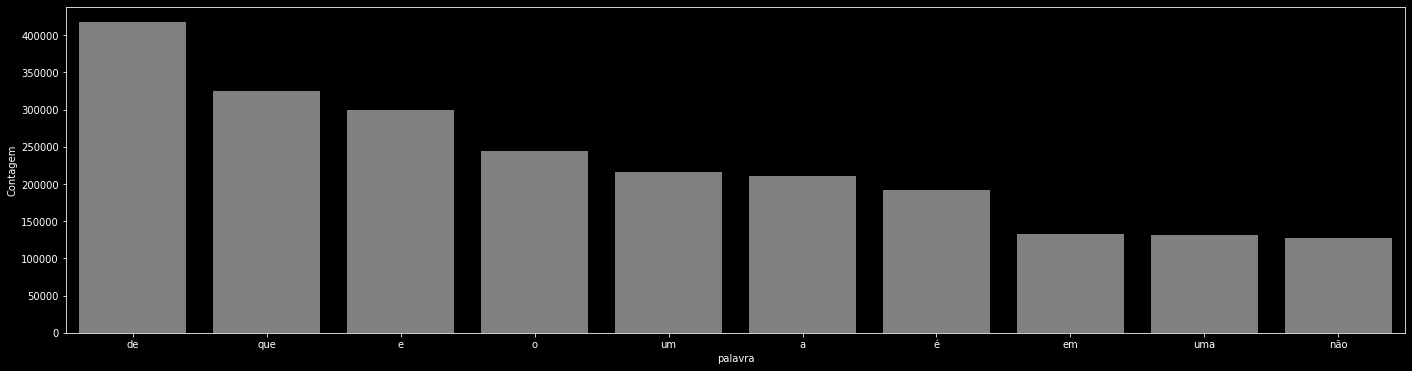

In [37]:
pareto(dados, 'text_pt', 10)

In [38]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = list()


In [39]:
for opiniao in dados.text_pt:
    nova_frase = list()
    palavra_texto = token_whitespace.tokenize(opiniao)

    for palavra in palavra_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))


In [40]:
dados['tratamento_1'] = frase_processada
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [78]:
tratamento_1 = classificar_texto(dados, "tratamento_1", "classificacao")
tratamento_1


0.6811160533764659

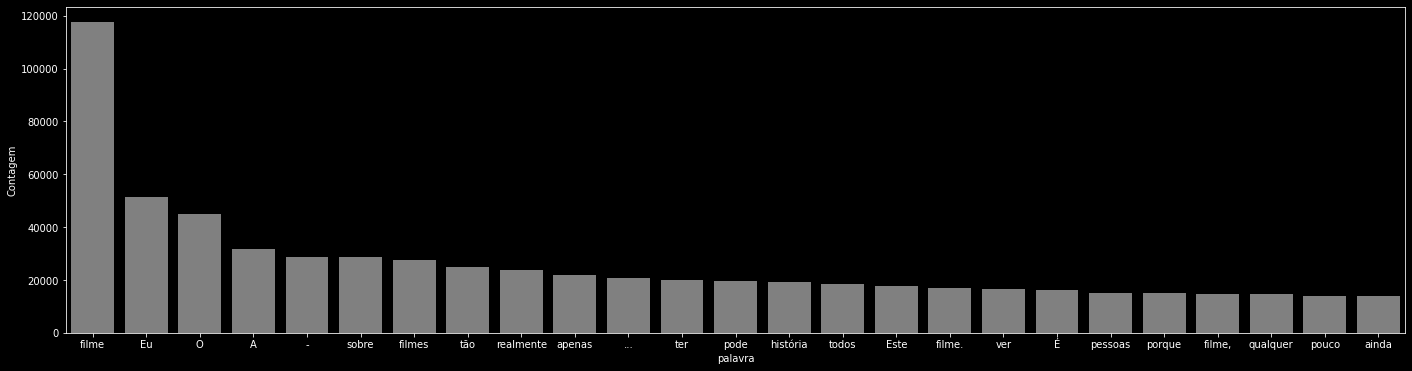

In [43]:
pareto(dados, 'tratamento_1', 25)

In [48]:
pontuacao = list()
frase_processada = list()

for ponto in punctuation:
    pontuacao.append(ponto)

palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
pontuacao_stopwords = pontuacao + palavras_irrelevantes

for opiniao in dados['tratamento_1']:
    nova_frase = list()
    palavra_texto = token_whitespace.tokenize(opiniao)

    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)

    frase_processada.append(' '.join(nova_frase))

dados['tratamento_2'] = frase_processada

In [49]:
dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...","Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...","Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...","Filmes fotos latão palavra apropriada eles, ve..."


In [80]:
tratamento_2 = classificar_texto(dados, "tratamento_2", "classificacao")
tratamento_2

0.6811160533764659

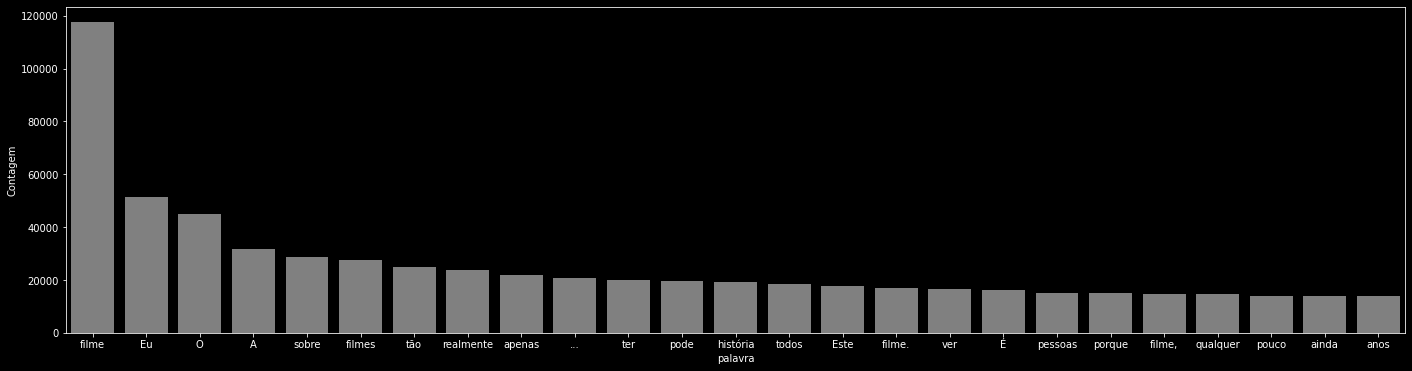

In [50]:
pareto(dados, 'tratamento_2', 25)

In [64]:
sem_acentos = [unidecode(texto) for texto in dados['tratamento_2']]


In [65]:
stopwords_sem_acentos = [unidecode(texto) for texto in pontuacao_stopwords]

In [66]:
dados['tratamento_3'] = sem_acentos

In [68]:
frase_processada = list()
for opiniao in dados['tratamento_3']:
    nova_frase = list()
    palavra_texto = token_whitespace.tokenize(opiniao)

    for palavra in palavra_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)

    frase_processada.append(' '.join(nova_frase))

dados['tratamento_3'] = frase_processada


In [ ]:
dados.head()

In [70]:
acuracia_tratamento_3 = classificar_texto(
    dados, 'tratamento_3', 'classificacao')

print(f'acuracia tratamento 3 ==> {acuracia_tratamento_3}')


acuracia tratamento 3 ==> 0.681196926809543


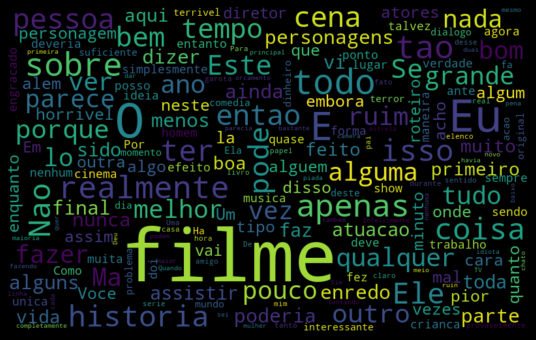

In [71]:
nuvem_palavras_neg(dados, 'tratamento_3')

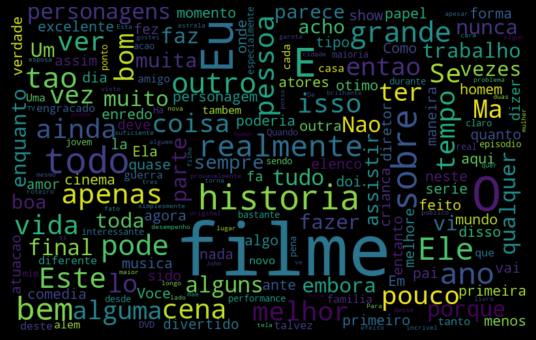

In [72]:
nuvem_palavras_pos(dados, 'tratamento_3')

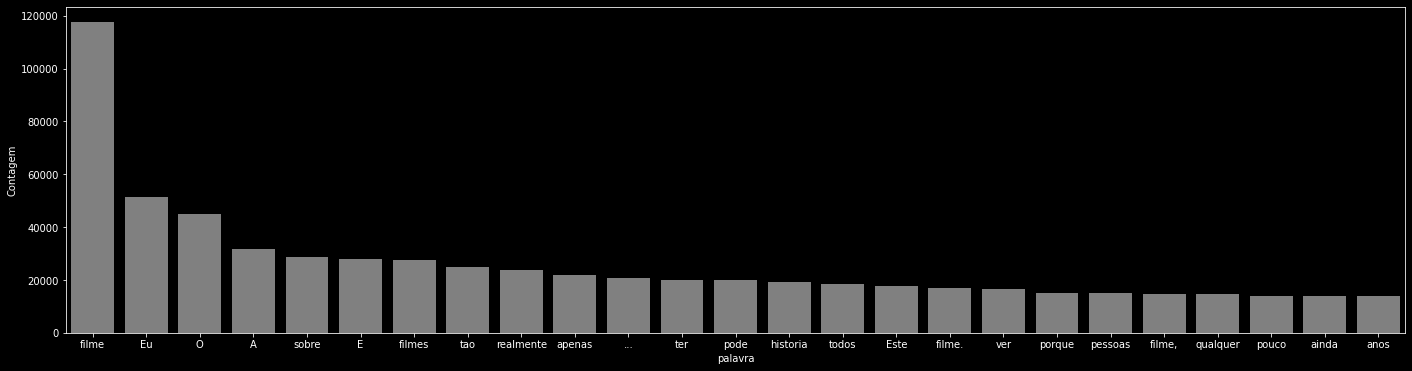

In [73]:
pareto(dados, 'tratamento_3', 25)

In [74]:
frase_processada = list()
for opiniao in dados['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavra_texto = token_whitespace.tokenize(opiniao)

    for palavra in palavra_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)

    frase_processada.append(' '.join(nova_frase))

dados['tratamento_4'] = frase_processada


In [75]:
acuracia_tratamento_4 = classificar_texto(
    dados, 'tratamento_4', 'classificacao')



acuracia tratamento 4 ==> 0.6879902951880308


In [81]:
print(f'acuracia tratamento 1 ==> {tratamento_1}')
print(f'acuracia tratamento 2 ==> {tratamento_2}')
print(f'acuracia tratamento 3 ==> {acuracia_tratamento_3}')
print(f'acuracia tratamento 4 ==> {acuracia_tratamento_4}')


acuracia tratamento 1 ==> 0.6811160533764659
acuracia tratamento 2 ==> 0.6811160533764659
acuracia tratamento 3 ==> 0.681196926809543
acuracia tratamento 4 ==> 0.6879902951880308


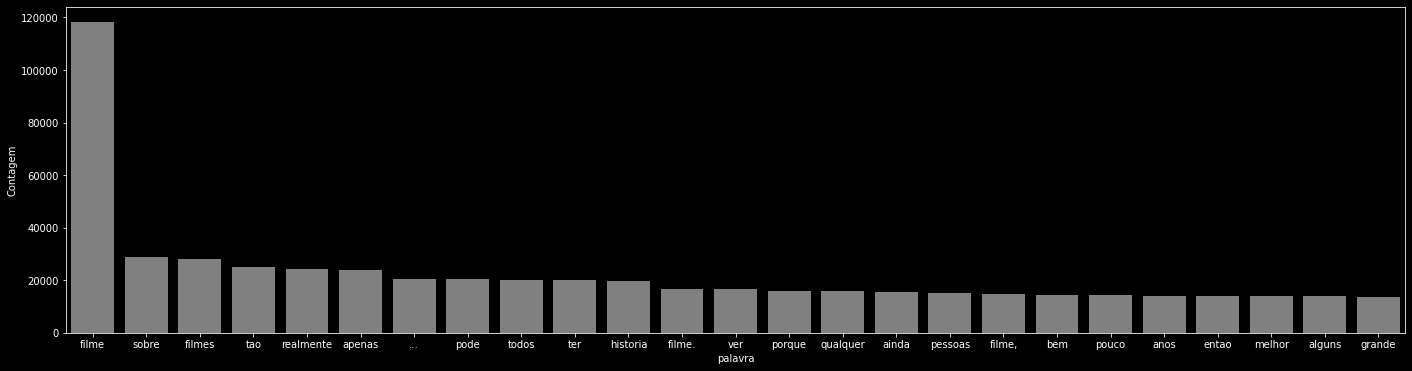

In [76]:
pareto(dados, 'tratamento_4', 25)

In [83]:
stemmer = nltk.RSLPStemmer()

frase_processada = list()
for opiniao in dados['tratamento_4']:
    nova_frase = list()
    palavra_texto = token_whitespace.tokenize(opiniao)

    for palavra in palavra_texto:
        nova_frase.append(stemmer.stem(palavra))

    frase_processada.append(' '.join(nova_frase))

dados['tratamento_5'] = frase_processada


In [84]:
acuracia_tratamento_5 = classificar_texto(
    dados, 'tratamento_5', 'classificacao')

In [85]:
print(f'acuracia tratamento 1 ==> {tratamento_1}')
print(f'acuracia tratamento 2 ==> {tratamento_2}')
print(f'acuracia tratamento 3 ==> {acuracia_tratamento_3}')
print(f'acuracia tratamento 4 ==> {acuracia_tratamento_4}')
print(f'acuracia tratamento 5 ==> {acuracia_tratamento_5}')

acuracia tratamento 1 ==> 0.6811160533764659
acuracia tratamento 2 ==> 0.6811160533764659
acuracia tratamento 3 ==> 0.681196926809543
acuracia tratamento 4 ==> 0.6879902951880308
acuracia tratamento 5 ==> 0.6834613829357056


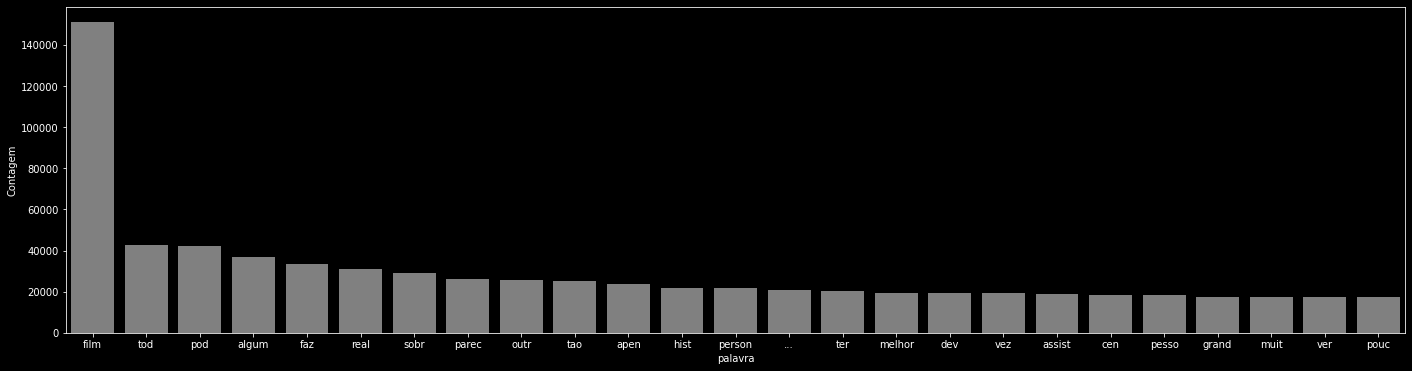

In [86]:
pareto(dados, 'tratamento_5', 25)

In [90]:
example = ["Assistir um filme ótimo", "Assistir um filme péssimo"]
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

characters = tfidf.fit_transform(example)
pd.DataFrame(data=characters.todense(), columns=tfidf.get_feature_names_out())


,Assistir,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [94]:
tfidf_bruto = tfidf.fit_transform(dados['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_bruto, dados['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_bruto


0.6600889607763849

In [95]:
tfidf_tratados = tfidf.fit_transform(dados['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_tratados, dados['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratados


0.6876668014557218

In [97]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(dados['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(
    vetor_tfidf, dados['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngram = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngram

0.8774767488879903

In [98]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(dados['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(
    vetor_tfidf, dados['classificacao'], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf

0.881520420541852

In [101]:
pesos = pd.DataFrame(data=regressao_logistica.coef_[0].T, index=tfidf.get_feature_names_out())


In [102]:
pesos.nlargest(25, 0)

,0
otim,8.434044
excel,6.865855
favorit,5.609154
incrivel,5.165632
perfeit,4.783555
excelente,4.662488
definitiv,4.373411
maravilh,4.265835
ador,4.233555
perfeito,4.183764


In [103]:
pesos.nsmallest(25, 0)

,0
ruim,-9.725030
pi,-9.722499
horrivel,-7.529602
nad,-6.465588
terrivel,-5.845638
horri,-5.539829
chat,-5.465997
parec,-5.456331
nenhum,-5.292454
mal,-5.185933
